In [212]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize': (20, 10)}
)

In [213]:
# Первоначально загрузим данные о пользователях, заказах и товарных позициях, присвоив им переменные. 
# После проверки на тип данных, нужные колонки преобразованы к типу данных datetime64.

In [214]:
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-shipitsyn-42/olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [215]:
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-shipitsyn-42/olist_orders_dataset.csv', 
                    parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [216]:
orders_items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-shipitsyn-42/olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])
orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [217]:
# Дата первого заказа в данных
orders.order_purchase_timestamp.min() 

Timestamp('2016-09-04 21:15:19')

In [218]:
# Дата последнего заказа в данных
orders.order_purchase_timestamp.max() 

Timestamp('2018-10-17 17:30:18')

In [219]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [220]:
orders_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [221]:
# 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [222]:
# Проверим какие статусы заказов встречаются в данных и отберем нужные для решения
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [223]:
# Для дальнейшего решения возьмем только статусы заказа: approved - подвержден, processing —  в процессе сборки заказа, 
# shipped —  отгружен со склада, delivered —  доставлен пользователю

In [224]:
# Заджоиним данные по заказам и пользователям
customers_orders = orders.merge(customers, on='customer_id') 
customers_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [225]:
customers_orders.query("order_status == ['approved', 'processing', 'shipped', 'delivered']") \
    .groupby('customer_unique_id', as_index=False).agg({'customer_unique_id': 'count'}) \
    .rename(columns={'customer_unique_id':'quantity'}).value_counts()

quantity
1           91816
2            2637
3             187
4              29
5               9
6               5
7               3
16              1
9               1
dtype: int64

In [226]:
# Количество пользователей заказавших товар один раз - 91816

In [227]:
# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

In [228]:
# создаем отдельную колонку, где дата заказа приведена к началу месяца
orders['purchase_by_month'] = orders['order_purchase_timestamp'].astype('datetime64[M]')
orders.purchase_by_month.head()

0   2017-10-01
1   2018-07-01
2   2018-08-01
3   2017-11-01
4   2018-02-01
Name: purchase_by_month, dtype: datetime64[ns]

In [229]:
# Находим количество недоставленных заказов по причинам canceled и unavailable, по ним можно утверждать что заказ не доставлен.
orders_nd = orders.query('order_status == ["canceled", "unavailable"]') \
    .groupby(['purchase_by_month', 'order_status'], as_index=False) \
    .agg({'order_id': 'nunique'}).rename(columns={'order_id':'quantity'})
orders_nd.groupby('order_status', as_index=False).agg({'quantity':'sum'})

,order_status,quantity
0,canceled,625
1,unavailable,609


In [230]:
orders_nd.groupby('order_status', as_index=False).agg({'quantity':'mean'}).round(1)

,order_status,quantity
0,canceled,26.0
1,unavailable,29.0


In [231]:
# Количество в среднем недоставленных заказов в месяц приведено в табличке выше.

In [232]:
# 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [233]:
# Заджоиним таблицы с заказами и товаром
purchase = customers_orders.merge(orders_items, on='order_id') \
    .query("order_status == ['approved', 'processing', 'shipped', 'delivered']") 
purchase.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [234]:
# Будем считать что покупка совершилась в момент времени "order_purchase_timestamp" и создадим колонку с днем недели
purchase['weekday_purchase_timestamp'] = purchase.order_purchase_timestamp.dt.day_name() 
purchase.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weekday_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday


In [235]:
# Находим в какой день недели каждый товар чаще всего покупается
purchase.groupby(["product_id", "weekday_purchase_timestamp"], as_index=False) \
        .agg({"customer_unique_id": "nunique"}) \
        .sort_values(['customer_unique_id', 'product_id'], ascending=False) \
        .rename(columns={'customer_unique_id':'quantity'})

,product_id,weekday_purchase_timestamp,quantity
36178,99a4788cb24856965c36a24e339b6058,Monday,87
40679,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,75
36177,99a4788cb24856965c36a24e339b6058,Friday,74
36181,99a4788cb24856965c36a24e339b6058,Thursday,70
19944,53b36df67ebb7c41585e8d54d6772e08,Tuesday,70
...,...,...,...
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1


In [236]:
# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, 
# что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. 
# И внутри метрики это нужно учесть.

In [237]:
# Для дальнейшего решения используем уже имеющийся датасет.
customers_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [238]:
# имея дату заказа, создадим столбик с названием месяца
customers_orders['month'] = customers_orders.order_purchase_timestamp.dt.month_name() 

In [239]:
# посчитаем и запишем в отдельный столбик количество недель в месяце
customers_orders['weeks_quantity'] = customers_orders.order_purchase_timestamp.dt.days_in_month / 7 

In [240]:
# Находим количество покупок совершенных каждым пользователем в каждый месяц
purchase_by_week = customers_orders.query("order_status == ['approved','processing', 'shipped', 'delivered']") \
    .groupby(['customer_unique_id', 'month', 'weeks_quantity'], as_index=False) \
    .agg({'order_status': 'count'}).rename(columns={'order_status':'quantity_purchase'}) \
    .sort_values('quantity_purchase', ascending=False)
purchase_by_week

,customer_unique_id,month,weeks_quantity,quantity_purchase
7211,12f5d6e1cbf93dafd9dcc19095df0b3d,January,4.428571,6
14258,25a560b9a6006157838aab1bdbd68624,April,4.285714,4
23565,3e43e6105506432c953e165fb2acf44c,February,4.000000,4
53176,8d50f5eadf50201ccdcedfb9e2ac8455,August,4.428571,4
68310,b4e4f24de1e8725b74e4a1f4975116ed,February,4.000000,4
...,...,...,...,...
32357,55a2d38a48216287f07c360037b1955b,February,4.000000,1
32356,55a2c780cc65e883981402b88dbd44d7,June,4.285714,1
32355,55a269f324455e78349e7b9b7e7e5911,November,4.285714,1
32354,55a08a9545274dc36a0c5804389217d4,March,4.428571,1


In [241]:
# Находим среднее количество покупок в неделю по месяцам для каждого покупателя.
purchase_by_week['avg_purchase_week'] = purchase_by_week.quantity_purchase/purchase_by_week.weeks_quantity
purchase_by_week

,customer_unique_id,month,weeks_quantity,quantity_purchase,avg_purchase_week
7211,12f5d6e1cbf93dafd9dcc19095df0b3d,January,4.428571,6,1.354839
14258,25a560b9a6006157838aab1bdbd68624,April,4.285714,4,0.933333
23565,3e43e6105506432c953e165fb2acf44c,February,4.000000,4,1.000000
53176,8d50f5eadf50201ccdcedfb9e2ac8455,August,4.428571,4,0.903226
68310,b4e4f24de1e8725b74e4a1f4975116ed,February,4.000000,4,1.000000
...,...,...,...,...,...
32357,55a2d38a48216287f07c360037b1955b,February,4.000000,1,0.250000
32356,55a2c780cc65e883981402b88dbd44d7,June,4.285714,1,0.233333
32355,55a269f324455e78349e7b9b7e7e5911,November,4.285714,1,0.233333
32354,55a08a9545274dc36a0c5804389217d4,March,4.428571,1,0.225806


In [242]:
# 5. Используя pandas, проведи когортный анализ пользователей. 
# В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [243]:
# Так как в задании указан период с января по декабрь и зная временной интервал наших данных, 
# для решения возьмем когорты за 2017 год.
# Когорту сформируем по первой совершенной покупке.

In [244]:
# Отбираем данные с покупками
cog_data = customers_orders.query("order_status == ['approved', 'processing', 'shipped', 'delivered']")

In [245]:
# Приводим дату покупки к началу месяца 
cog_data['purchase_by_month'] = cog_data['order_purchase_timestamp'].astype('datetime64[M]')

# сохраняем в отдельном столбце месяц в котором была совершена первая покупка покупателем в году
cog_data['date_first_buy'] = cog_data.groupby('customer_unique_id')['order_purchase_timestamp'] \
    .transform(min).astype('datetime64[M]') 
cog_data.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month,weeks_quantity,purchase_by_month,date_first_buy
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,October,4.428571,2017-10-01,2017-09-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,July,4.428571,2018-07-01,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,August,4.428571,2018-08-01,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,November,4.285714,2017-11-01,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,February,4.000000,2018-02-01,2018-02-01


In [246]:
# Считаем количество покупок в первый и последующий месяцы, совершенные пользователями
retention = cog_data.query('date_first_buy >= "2017-01-01" & date_first_buy <= "2017-12-01"') \
    .groupby(['date_first_buy', 'purchase_by_month'], as_index=False) \
    .agg({'customer_unique_id': 'nunique'}).rename(columns={'customer_unique_id':'quantity_purchase'})
retention

,date_first_buy,purchase_by_month,quantity_purchase
0,2017-01-01,2017-01-01,740
1,2017-01-01,2017-02-01,3
2,2017-01-01,2017-03-01,2
3,2017-01-01,2017-04-01,1
4,2017-01-01,2017-05-01,3
...,...,...,...
166,2017-12-01,2018-04-01,14
167,2017-12-01,2018-05-01,11
168,2017-12-01,2018-06-01,9
169,2017-12-01,2018-07-01,1


In [247]:
# Находим значение retention для каждого месяца в процентах
retention['retention_cf'] = 100 * retention['quantity_purchase'] / retention.groupby('date_first_buy')['quantity_purchase'] \
    .transform(max)
retention

,date_first_buy,purchase_by_month,quantity_purchase,retention_cf
0,2017-01-01,2017-01-01,740,100.000000
1,2017-01-01,2017-02-01,3,0.405405
2,2017-01-01,2017-03-01,2,0.270270
3,2017-01-01,2017-04-01,1,0.135135
4,2017-01-01,2017-05-01,3,0.405405
...,...,...,...,...
166,2017-12-01,2018-04-01,14,0.258112
167,2017-12-01,2018-05-01,11,0.202802
168,2017-12-01,2018-06-01,9,0.165929
169,2017-12-01,2018-07-01,1,0.018437


In [248]:
# Добавляем столбик с количеством месяцев, прошедших с первой покупки.
retention['count_month'] = ((retention.purchase_by_month - retention.date_first_buy).dt.days/30.42).round(0).astype(int)

In [249]:
# Приводим таблицу в читаемый вид
retention.pivot_table(index='date_first_buy', columns='count_month', values = 'retention_cf').fillna(0)

count_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
date_first_buy,,,,,,,,,,,,,,,,,,,
2017-01-01,100.0,0.405405,0.270270,0.135135,0.405405,0.135135,0.405405,0.135135,0.135135,0.000000,0.405405,0.135135,0.675676,0.405405,0.135135,0.135135,0.270270,0.405405,0.135135
2017-02-01,100.0,0.238237,0.297796,0.119119,0.416915,0.119119,0.238237,0.178678,0.119119,0.178678,0.119119,0.297796,0.119119,0.178678,0.119119,0.059559,0.059559,0.238237,0.000000
2017-03-01,100.0,0.506231,0.350467,0.389408,0.350467,0.155763,0.155763,0.311526,0.350467,0.077882,0.350467,0.116822,0.233645,0.116822,0.155763,0.233645,0.077882,0.155763,0.000000
2017-04-01,100.0,0.605798,0.216357,0.173085,0.302899,0.259628,0.346170,0.302899,0.302899,0.173085,0.259628,0.086543,0.043271,0.043271,0.086543,0.086543,0.129814,0.000000,0.000000
2017-05-01,100.0,0.482270,0.482270,0.397163,0.312057,0.340426,0.425532,0.141844,0.255319,0.255319,0.255319,0.340426,0.255319,0.028369,0.198582,0.226950,0.000000,0.000000,0.000000
2017-06-01,100.0,0.452489,0.355527,0.387847,0.258565,0.355527,0.355527,0.226244,0.129282,0.226244,0.323206,0.323206,0.161603,0.129282,0.193924,0.000000,0.000000,0.000000,0.000000
2017-07-01,100.0,0.524246,0.340760,0.235911,0.288336,0.209699,0.314548,0.104849,0.183486,0.262123,0.209699,0.288336,0.131062,0.262123,0.000000,0.000000,0.000000,0.000000,0.000000
2017-08-01,100.0,0.680934,0.340467,0.267510,0.364786,0.535019,0.291829,0.267510,0.145914,0.145914,0.243191,0.194553,0.121595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-09-01,100.0,0.689655,0.541872,0.295567,0.443350,0.221675,0.221675,0.246305,0.295567,0.172414,0.270936,0.073892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [200]:
# Из таблицы видно, что большее значение retention на 3-й месяц наблюдается у группы пользователей, 
# совершивших первую покупку в Мае (0.397163).

In [42]:
# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. 
# Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
# В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, 
# F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. 
# Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, 
# frequency и monetary для интерпретации этих кластеров.

In [43]:
# Зададимся следующими метриками RFM: 

# R - время от последней покупки пользователя до текущей даты. 
# Текущей датой будем считать последнюю по времени дату создания заказа.

# F - суммарное количество покупок у пользователя за всё время

# M - сумма покупок за всё время

In [44]:
# Для решения объеденим все данные в одну таблицу и оставим только данные с покупками
all_data = orders.merge(customers, on='customer_id').merge(orders_items, on='order_id')
all_data.query("order_status == ['approved', 'processing', 'shipped', 'delivered']")
all_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_by_month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-01,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-01,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-01,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-01,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-01,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-02-01,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-08-01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01-01,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01-01,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [45]:
# Найдем сумму каждого заказа
rfm_data = all_data.groupby(['order_id', 'customer_unique_id', 'order_purchase_timestamp'], as_index=False) \
    .agg({'price': 'sum'})
rfm_data

,order_id,customer_unique_id,order_purchase_timestamp,price
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02,58.90
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 10:53:06,239.90
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31,199.00
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:00:35,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 13:57:51,199.90
...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,0c9aeda10a71f369396d0c04dce13a64,2018-04-23 13:57:06,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,0da9fe112eae0c74d3ba1fe16de0988b,2018-07-14 10:26:46,350.00
98663,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,2017-10-23 17:07:56,99.90
98664,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,2017-08-14 23:02:59,55.99


In [46]:
# Найдем самую позднюю дату заказа
max_date = rfm_data.order_purchase_timestamp.max() 
max_date

Timestamp('2018-09-03 09:06:57')

In [47]:
# Считаем метрики RFM для каждого покупателя
rfm = rfm_data.groupby('customer_unique_id', as_index=False) \
    .agg({'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
          'order_id': lambda x: x.count(),
          'price': lambda x: x.sum()}) \
    .rename(columns={'order_purchase_timestamp': 'recency', 'order_id':'frequency', 'price':'monetary'})

In [48]:
rfm.sort_values('frequency', ascending=False)

,customer_unique_id,recency,frequency,monetary
52597,8d50f5eadf50201ccdcedfb9e2ac8455,13,16,729.62
23302,3e43e6105506432c953e165fb2acf44c,187,9,1000.85
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,200,7,809.21
37532,6469f99c1f9dfae7733b25662e7f1782,67,7,664.20
75560,ca77025e7201e3b30c44b472ff346268,93,7,806.61
...,...,...,...,...
32272,5657f9f721c16800a66c21081d46b18d,287,1,56.99
32271,5657dfebff5868c4dc7e8355fea865c4,295,1,89.99
32270,5657596addb4d7b07b32cd330614bdf8,304,1,159.99
32269,5656eb169546146caeab56c3ffc3d268,38,1,110.00


In [49]:
rfm.describe()

,recency,frequency,monetary
count,95420.000000,95420.000000,95420.000000
mean,242.600377,1.034018,142.440198
std,153.160320,0.211234,217.656355
min,0.000000,1.000000,0.850000
25%,118.000000,1.000000,47.900000
50%,223.000000,1.000000,89.900000
75%,352.000000,1.000000,155.000000
max,728.000000,16.000000,13440.000000


In [50]:
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles 

{'recency': {0.2: 97.0, 0.4: 181.0, 0.6: 272.0, 0.8: 388.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [52]:
#Изучив квантили распределения выставим оценки метрик recency, frequency и monetary следующим образом:

# recency: 5 - наименьшее время прошедшее с последней покупки, 1 - наибольшее время 

# monetory: 5 - наибольшая сумма покупок, 1 - наименьшая сумма

# frequency: исходя из того что большиство пользователей совершили один заказ, 
# разделим оценки на две группы 1 - 1 заказ, 2 - 2 и более заказов

In [53]:
def r_value(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

In [54]:
def f_value(x):
    if x == 1:
        return 1
    elif x > 1:
        return 2

In [55]:
def m_value(x):
    if x <= quintiles['monetary'][.2]:
        return 1
    elif x <= quintiles['monetary'][.4]:
        return 2
    elif x <= quintiles['monetary'][.6]:
        return 3
    elif x <= quintiles['monetary'][.8]:
        return 4
    else:
        return 5 

In [56]:
rfm['r'] = rfm['recency'].apply(lambda x: r_value(x))
rfm['f'] = rfm['frequency'].apply(lambda x: f_value(x))
rfm['m'] = rfm['monetary'].apply(lambda x: m_value(x))

In [57]:
# создадим итоговый столбик total_value
rfm['total_value'] = rfm['r'].map(str) + rfm['f'].map(str) + rfm['m'].map(str) 
rfm

,customer_unique_id,recency,frequency,monetary,r,f,m,total_value
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,2,1,5,215
...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,1,1,5,115
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,3,1,2,312
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90,1,1,3,113
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00,4,1,4,414


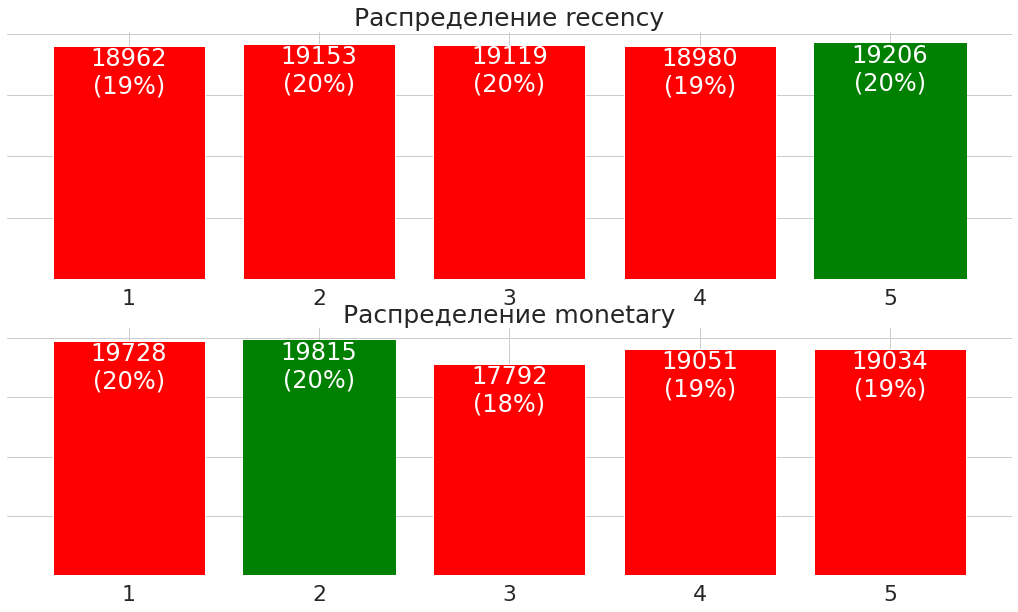

In [58]:
# строим график распределения клиентов по R и M оценкам
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))

for i, p in enumerate(['r', 'm']):
    parameters = {'r': 'recency', 'm': 'monetary'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='red')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Распределение {}'.format(parameters[p]), fontsize=25)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('green')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
                ha='center',
                va='top',
                color='w')

plt.show()

In [59]:
# По графику recency видно что распределение по времени с момента последней покупки равномерно, 
# но тем не менее большая группа тех кто делал заказ более года назад. 

# По графику monetary распределение так же менее равномерно, но тем не менее его тоже можно назвать равномерным.
# Большая группа пользователей тех, тех кто принес доход ниже среднего.

In [60]:
# Рассмотрим пользователей по обоим показателям вместе, для этого сегментируем пользователей по показателям recency и monetary 
# и присвоим этим группам названия
group_name = {
    r'[1-2][1-2]': 'Давно не покупали и принесли мало денег',
    r'[1-2]3': 'Давно не покупали и принесли средний доход',
    r'[1-2][4-5]': 'Давно не покупали, но покупки были стоящими',
    r'3[1-2]': 'Не покупали примерно пол года, принесли мало денег',
    r'33': 'Не покупали примерно пол года, принесли средний доход',
    r'3[4-5]': 'Не покупали примерно пол года, но покупки были стоящими',
    r'[4-5][1-2]': 'Купили недавно, принесли мало денег',
    r'[4-5]3': 'Купили недавно и принесли средний доход',
    r'[4-5][4-5]': 'Купили недавно и покупки были стоящими'
}
rfm['group'] = rfm['r'].map(str) + rfm['m'].map(str)
rfm['group'] = rfm['group'].replace(group_name, regex=True)
rfm.head() 

,customer_unique_id,recency,frequency,monetary,r,f,m,total_value,group
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,4,1,4,414,Купили недавно и покупки были стоящими
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,4,1,1,411,"Купили недавно, принесли мало денег"
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,2,112,Давно не покупали и принесли мало денег
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,2,1,1,211,Давно не покупали и принесли мало денег
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,2,1,5,215,"Давно не покупали, но покупки были стоящими"


In [61]:
r_gr=rfm.groupby('group', as_index=False).agg({'frequency':'count'}) \
    .rename(columns={'frequency':'users'}).sort_values('users', ascending=False)

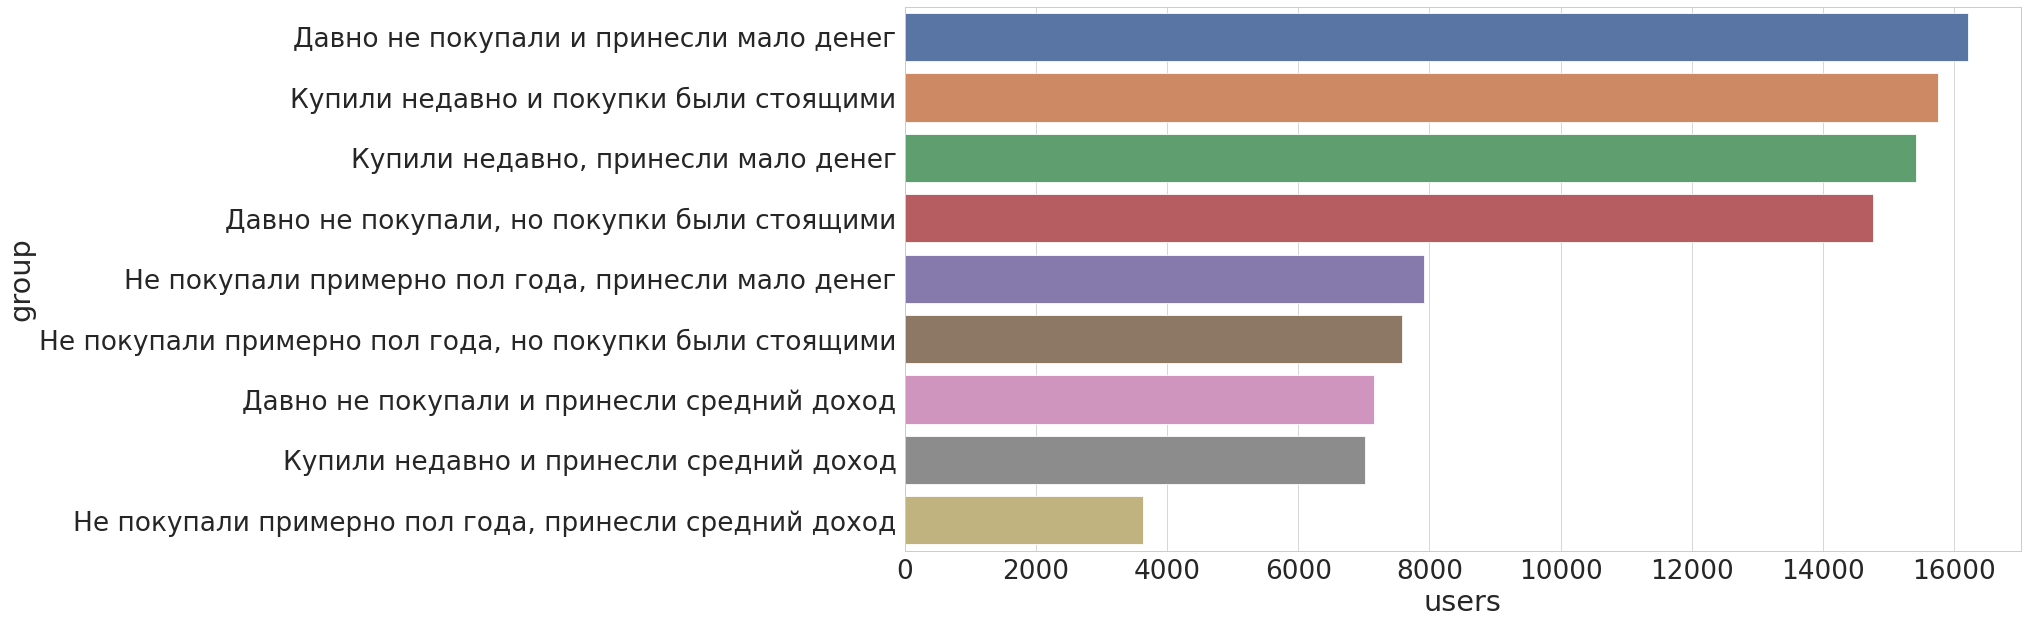

In [62]:
# Построим график распределения по группам пользователей
sns.set_context("paper", font_scale=3)
sns.barplot(x='users', y='group', data=r_gr)

In [63]:
# Из графика видно что в группе 'Давно не покупали, но покупки были стоящими' много пользователей,
# стоит уделить им внимание и попытаться вернуть для дальнейших покупок, так как они приносят хороший доход для компании.

# Группы с пользователями, принесшими средний доход для компании являются не самыми многочисленными, но их покупательская 
# способность в потенциале может оказаться интерсеной, поэтому стоит уделить им внимание.

# Также большая группа пользователей совершивших покупку недавно, но на небольшую сумму. Вероятно стоит обартить на них внимание, 
# так как увеличив количество покупок и средний чек этих покупателей, можно получить неплохой доход. 